<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h2 align="center">Porya Morovati Nilaore (PMN)<h2>
    <h3 align="center">GooglePlayStore</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg"  width=50% >

<H2>Importing the libraries</H2>

In [1]:
# EDA for GooglePlayStore DataFrame
# Using Python3.9.7 and Anaconda3-2021.11
# You can find me in github >> https://github.com/pmne324
# googleplaystore.csv file is available in "../googleplaystore_ml/googleplaystore.csv" directory

In [2]:
import numpy as np              #linear algebra library
import matplotlib.pyplot as plt #library for drawing diagrams
import seaborn as sns           #library for drawing plot
import pandas as pd             #library for data processing
from pandas_profiling import ProfileReport
%matplotlib inline

In [7]:
# pr = ProfileReport(df)

<H2>Load and Prepare Data</H2>

In [6]:
# load csv file
df = pd.read_csv("googleplaystore.csv")
df_raw = pd.read_csv("googleplaystore.csv")

<H2>EDA (Use Pandas)</H2>

In [3]:
# show head of data frame
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


According to what we see above, there are data that are not numerical, next step is to convert non-numerical data to numerical one.

<H3>Resolve missing data</H3>

In [8]:
pd.isnull(df).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.shape

(10841, 13)

In [10]:
df.columns = [c.replace(' ','_') for c in df.columns]

"Rating", "Type", "Content_Rating", "Content_Ver" and "Android_Ver" should be modify before use

<H4>Missing value check for "Rating" Category</H4>

In [11]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [12]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [13]:
df['Rating'].isnull().sum()

0

<H4>Remove unusual data for "Type", "Content_Rating", "Current_Ver" and "Android_Ver" Catagories</H4>

In [14]:
df.dropna(subset=['Type'], inplace=True)
df.dropna(subset=['Content_Rating'], inplace=True)
df.dropna(subset=['Current_Ver'], inplace=True)
df.dropna(subset=['Android_Ver'], inplace=True)

<H3>Double check for missing data</H3>

In [15]:
pd.isnull(df).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

<H2>Convert data type</H2>

In [16]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [17]:
df.Reviews = df.Reviews.astype(float)

In [18]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df.Size = df.Size.apply(value_to_float)

In [19]:
df.Installs = [i.replace('+', '') for i in df.Installs]

In [20]:
df.Installs

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10829, dtype: object

In [21]:
df.Installs = [i.replace(',', '') for i in df.Installs]

In [22]:
df.Installs = df.Installs.astype(float)

In [23]:
df.Price = [j.replace('$', '') for j in df.Price]


In [24]:
df.Price = df.Price.astype(float)

<H3>Double check for data type</H3>

In [25]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

<H2>Visualization</H2>

<H3>Draw diagrams related to Category and Installs data:</H3>

In [26]:
dfci = df[['Category','Installs']]

In [27]:
dfci.tail()

,Category,Installs
10836,FAMILY,5000.0
10837,FAMILY,100.0
10838,MEDICAL,1000.0
10839,BOOKS_AND_REFERENCE,1000.0
10840,LIFESTYLE,10000000.0


In [28]:
dfci = dfci.sort_values('Installs', ascending=False)

<AxesSubplot:xlabel='Category', ylabel='count'>

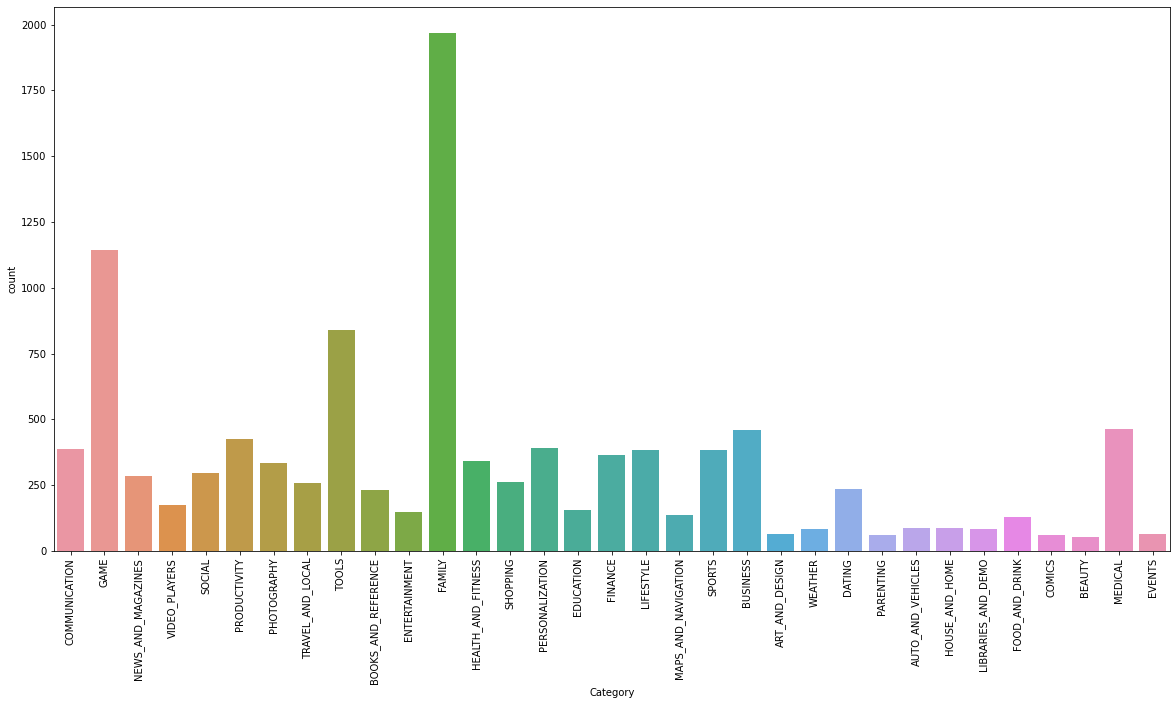

In [29]:
figure, axis = plt.subplots(figsize=(20,10))
plt.xticks(rotation = 90)
sns.countplot(x='Category', data=dfci)

<AxesSubplot:xlabel='Category', ylabel='Installs'>

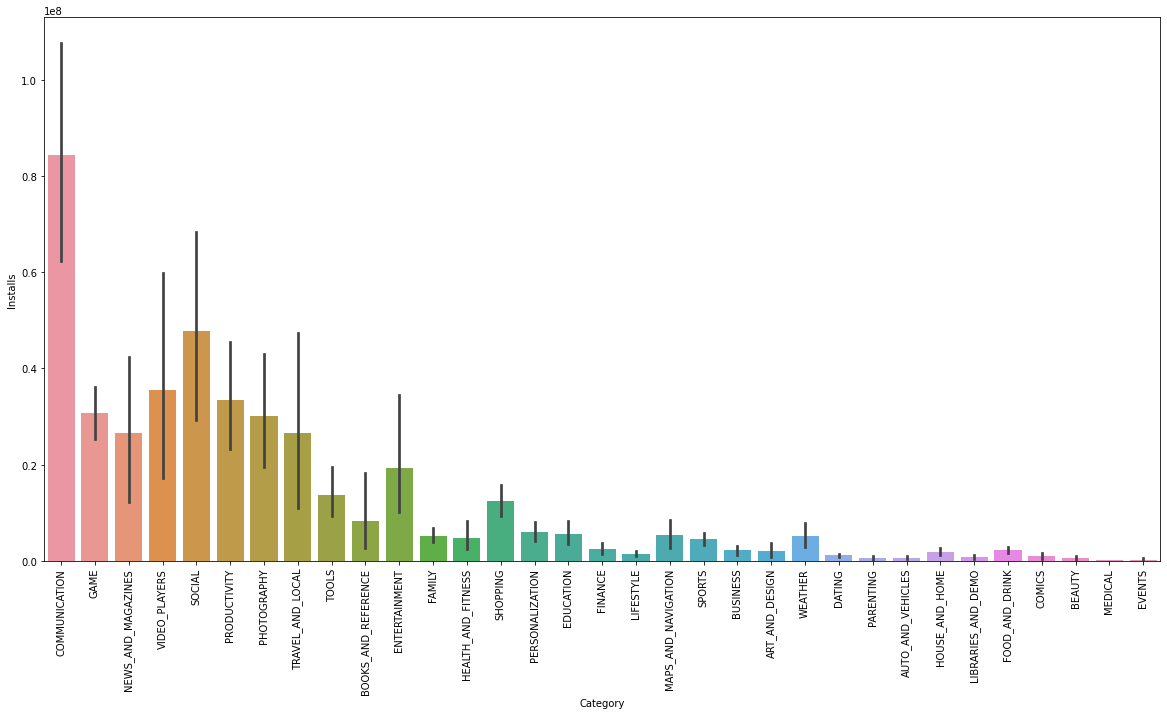

In [30]:
figure, axis = plt.subplots(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(x='Category', y='Installs', data=dfci)

<H3>Draw diagrams related to Category and Size data:</H3>

In [31]:
dfcs = df[['Category', 'Size']]

In [32]:
dfcs.sort_values('Size', ascending=False)

,Category,Size
3973,GAME,100000000.0
1565,LIFESTYLE,100000000.0
5865,FAMILY,100000000.0
1793,GAME,100000000.0
1758,GAME,100000000.0
...,...,...
714,EDUCATION,0.0
7566,TOOLS,0.0
3924,PRODUCTIVITY,0.0
7569,TOOLS,0.0


<AxesSubplot:xlabel='Category', ylabel='Size'>

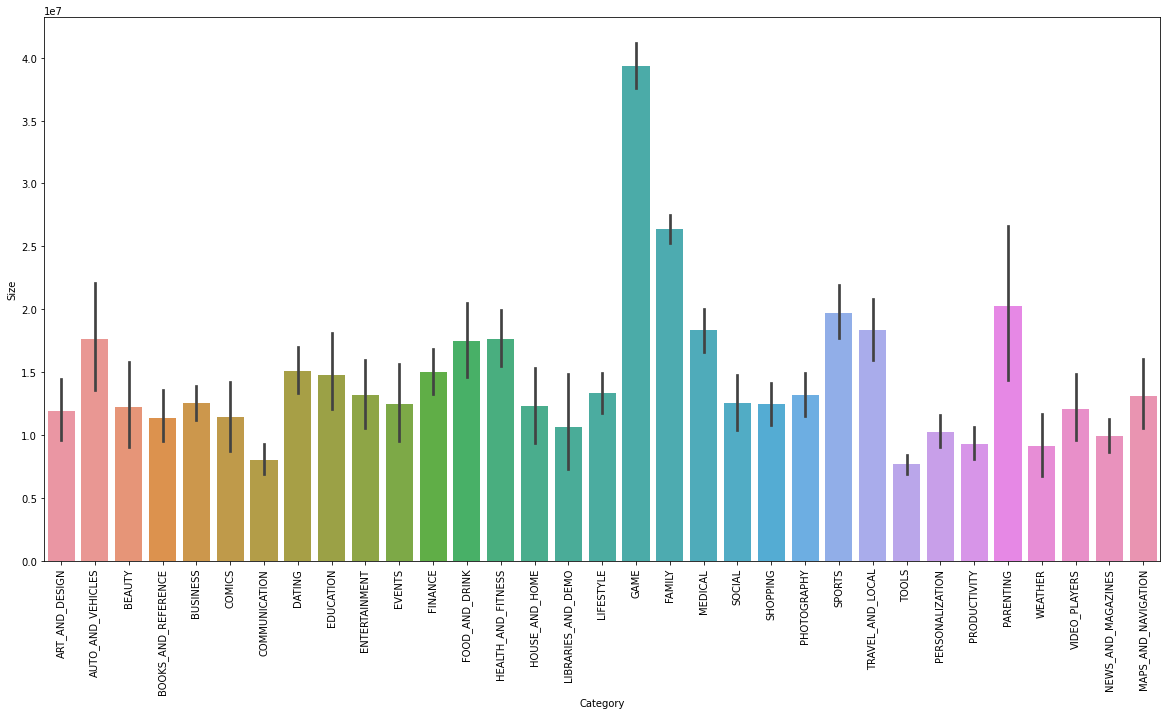

In [33]:
figure, axis = plt.subplots(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(x='Category', y='Size', data=dfcs)

<H3>Correlation</H3>

The most familiar measure of dependence between data quantities is shown in below

In [41]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063172,0.037189,0.045495,-0.019330
Reviews,0.063172,1.000000,0.065434,0.643112,-0.009674
Size,0.037189,0.065434,1.000000,-0.003466,-0.013573
Installs,0.045495,0.643112,-0.003466,1.000000,-0.011698
Price,-0.019330,-0.009674,-0.013573,-0.011698,1.000000


<AxesSubplot:>

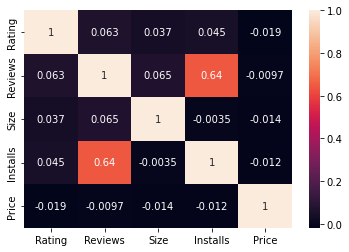

In [47]:
sns.heatmap(df.corr(),annot=True)